In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [53]:
# Load data
data = pd.read_csv("iris.data.csv")
X = data.drop('class', axis="columns")
y = data['class']


In [54]:

# Encoding target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [55]:

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [56]:

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [57]:
# ALE plot for 'sepal_length'
feature_name = 'sepal_length'
sepal_length_values = sorted(X_train[feature_name].unique())
print(sepal_length_values)


[4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.6, 7.7]


In [58]:
ale_values = []

In [59]:

for i in range(1, len(sepal_length_values)):
    lower_bound = sepal_length_values[i-1]
    upper_bound = sepal_length_values[i]
    print(lower_bound)
    print(upper_bound)
    
    # Create two copies of the dataset for the lower and upper intervals
    X_temp_lower = X_train.copy()
    X_temp_upper = X_train.copy()
    
    # Replace 'sepal_length' with the current interval bounds
    X_temp_lower[feature_name] = lower_bound
    X_temp_upper[feature_name] = upper_bound
    print(X_temp_lower)
    print(X_temp_upper)
    
    # Predict on both intervals and compute the difference
    pred_lower = model.predict(X_temp_lower)
    pred_upper = model.predict(X_temp_upper)
    ale = np.mean(pred_upper - pred_lower)  # Local effect
    ale_values.append(ale)


4.3
4.4
     sepal_length  sepal_width  petal_length  petal_width
22            4.3          3.6           1.0          0.2
15            4.3          4.4           1.5          0.4
65            4.3          3.1           4.4          1.4
11            4.3          3.4           1.6          0.2
42            4.3          3.2           1.3          0.2
..            ...          ...           ...          ...
71            4.3          2.8           4.0          1.3
106           4.3          2.5           4.5          1.7
14            4.3          4.0           1.2          0.2
92            4.3          2.6           4.0          1.2
102           4.3          3.0           5.9          2.1

[120 rows x 4 columns]
     sepal_length  sepal_width  petal_length  petal_width
22            4.4          3.6           1.0          0.2
15            4.4          4.4           1.5          0.4
65            4.4          3.1           4.4          1.4
11            4.4          3.4          

In [60]:
# Accumulate the local effects to get the ALE
ale_cumulative = np.cumsum(ale_values)
ale_cumulative_centered = ale_cumulative - np.mean(ale_cumulative)


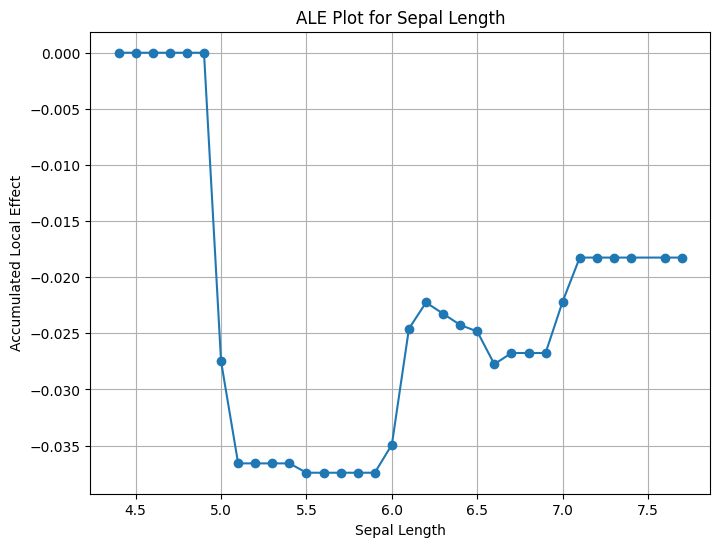

In [61]:

# Plotting the ALE Plot
plt.figure(figsize=(8, 6))
plt.plot(sepal_length_values[1:], ale_cumulative, marker='o')
plt.xlabel('Sepal Length')
plt.ylabel('Accumulated Local Effect')
plt.title('ALE Plot for Sepal Length')
plt.grid(True)
plt.show()